In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_yoFvVAMcwOE.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@Mohammad-z8y7k,Guys is it really worth the buying????? HELP\n...,2024-11-05T19:25:16Z,0,1
1,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@ayankogbeayodeji8228,Masterpiece! a western dream come true,2024-11-04T07:34:52Z,0,0
2,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@pencil199,Perfecrt score.,2024-10-23T02:00:34Z,0,1
3,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@TheDude-vc4lt,Easily the best game of all time. Played it fo...,2024-10-02T17:14:09Z,0,3
4,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@Har_Sim_racing,just getting into gaming at 60 years old and y...,2024-09-26T22:25:24Z,0,0
...,...,...,...,...,...,...,...,...
7380,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@danlee7923,I'll be picking this up at midnight tonight. 😊,2018-10-25T06:30:13Z,16,40
7381,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@smith-zf8hc,Oye,2018-10-25T06:30:12Z,0,0
7382,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@owenstrange7630,I thought it was on!,2018-10-25T06:30:06Z,0,0
7383,https://www.youtube.com/watch?v=yoFvVAMcwOE,Red Dead Redemption 2 Review,2018-10-25T10:58:25Z,@mclakers,Oye,2018-10-25T06:29:51Z,0,0


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game",
    "red", "dead", "redemption", "review", "game", "masterpiece", "western",
    "score", "played", "time", "getting", "gaming", "worth", "buying", "guys", 
    "true", "help","goty","look","first","lol","better","one","give","enough",
    "ever","wait""gon","going","horse","let","word","gon"
    

])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
2193,2018-11-01,Drool,drool
2194,2018-11-01,There needs to be a new game plus cause there’...,need new game plus cause
2195,2018-11-01,Love this game... don't mind at all that I get...,love game mind game john killing arthur omg
2196,2018-11-01,I have RD2 on xbox so if anyone has bo4 and wa...,rd2 xbox anyone bo4 want gameshare gameshare msg
2197,2018-11-01,You can also fish with dynamite wokrs for lege...,also fish dynamite wokrs legendary fish
...,...,...,...
7380,2018-10-25,I'll be picking this up at midnight tonight. 😊,ill picking midnight tonight
7381,2018-10-25,Oye,oye
7382,2018-10-25,I thought it was on!,thought
7383,2018-10-25,Oye,oye


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2018-10-28,What? no DLC!!! I guess we're gonna have to wa...,dlc guess gon wait version mean kind game born...,positive
1,2018-10-25,It got a 10. Stop worrying people and let's en...,stop worrying let enjoy ride,negative
2,2018-10-27,"""It really makes you feel like Batman.""",make like batman,positive
3,2018-10-25,I knew it would get a 10/10,knew would 1010,neutral
4,2018-10-25,GOTY,goty,neutral
...,...,...,...,...
495,2018-10-28,Sold after the horse testicles thing,sold horse testicle thing,neutral
496,2018-10-25,Great reviews from Jim Jeffries.,great review jim jeffries,positive
497,2018-10-26,It is honestly less free and more stiff of a g...,honestly less free stiff game expected shame,positive
498,2018-10-25,why is it not on PC!,,neutral


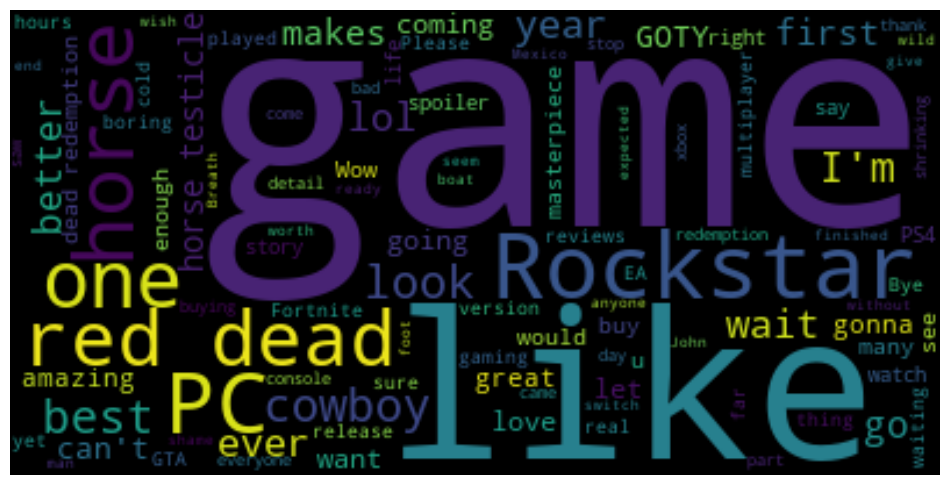

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

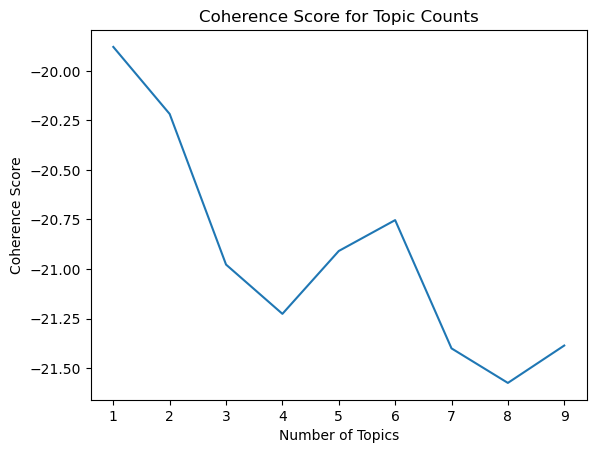

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 6
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.030*"cowboy" + 0.012*"testicle" + 0.012*"amazing" + 0.010*"glitch" + 0.009*"bad" + 0.009*"wait" + 0.008*"want" + 0.007*"thats" + 0.007*"cold" + 0.006*"man"'), (1, '0.016*"year" + 0.009*"many" + 0.008*"expected" + 0.008*"cry" + 0.007*"came" + 0.007*"switch" + 0.007*"waiting" + 0.006*"speechless" + 0.005*"released" + 0.005*"nothing"'), (2, '0.010*"doubt" + 0.008*"great" + 0.007*"hateful" + 0.006*"deserved" + 0.006*"gooooooooo" + 0.006*"john" + 0.005*"pooping" + 0.005*"disliked" + 0.005*"rockstar" + 0.005*"reviewer"'), (3, '0.016*"best" + 0.014*"wow" + 0.011*"multiplayer" + 0.010*"fortnite" + 0.008*"batman" + 0.007*"pet" + 0.007*"dog" + 0.007*"starting" + 0.005*"pro" + 0.005*"thing"'), (4, '0.011*"real" + 0.007*"boat" + 0.007*"hard" + 0.007*"thank" + 0.006*"foot" + 0.006*"spiderman" + 0.006*"rockstar" + 0.005*"though" + 0.005*"would" + 0.005*"boring"'), (5, '0.010*"shitting" + 0.008*"gta" + 0.007*"enjoy" + 0.007*"nice" + 0.007*"rockstar" + 0.007*"bye" + 0.006*"note" + 0.005*"hour"

The coherence score does not significantly improve beyond 5 topics, which suggests that adding more topics might not enhance interpretability.

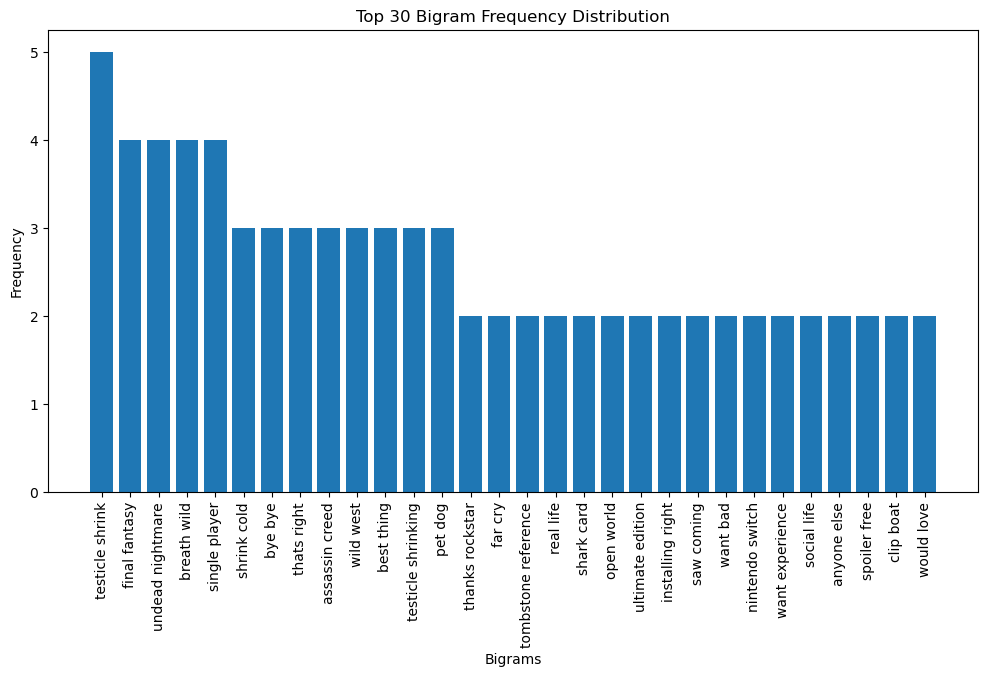

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,Apex Legends - Before You Buy,2
4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
5,Final Fantasy 7 Rebirth Review,4
6,Super Mario Bros. Wonder Review,4
7,Red Dead Redemption 2 Review,6
